In [ ]:
import pandas as pd

print("Pandas Version : {}".format(pd.__version__))

playerpoints = pd.read_excel(r'C:/Users/Kaustubh/Documents/JPMC/Project/PlayerPoints.xlsx')
teams = pd.read_excel(r'C:\Users\Kaustubh\Documents\JPMC\Project\Teams.xlsx')
joined = pd.read_excel(r'C:\Users\Kaustubh\Documents\JPMC\Project\final.xlsx')
final = pd.read_excel(r'C:\Users\Kaustubh\Documents\JPMC\Project\matches_final.xlsx')

print(joined.groupby('Team')['Pts'].sum())

final = pd.DataFrame(final)


In [ ]:
print(final.head())

In [ ]:
#import seaborn as sls
#code to compute a team-wise graphical representation of total match wins using a histogram
import matplotlib.pyplot as plt

df = pd.DataFrame(final)
df['winner'].hist(bins=50)
plt.show()

In [ ]:
import seaborn as sns

sns.countplot(y='winner',data=final)

In [3]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

print("Enter the details of the match : \n")
print("Format : Team Name Abbreviation\nChennai Super Kings CSK\nDelhi Capitals DC\nKings XI Punjab KXIP")
print("Kolkata Knight Riders KKR\nMumbai Indians MI\nRajasthan Royals RR\nRoyal Challengers Bangalore RCB ")
print("Sunrisers Hyderabad SRH\n")

team1 = input("Team 1 : ")
team2 = input("Team 2 : ")

toss_winner = input("Toss Winner : ")
toss_decision = input("Toss Decision : ")
venue = input("Venue : ")




Enter the details of the match : 

Format : Team Name Abbreviation
Chennai Super Kings CSK
Delhi Capitals DC
Kings XI Punjab KXIP
Kolkata Knight Riders KKR
Mumbai Indians MI
Rajasthan Royals RR
Royal Challengers Bangalore RCB 
Sunrisers Hyderabad SRH

Team 1 : Chennnai Super Kings CSK
Team 2 : Mumbai Indians MI
Toss Winner : Chennnai Super Kings CSK
Toss Decision : 1
Venue : sc


In [11]:
def class_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print('Cross validation Score : %s' % '{0:.3%}'.format(np.mean(error)))
    model.fit(data[predictors],data[outcome])


In [18]:
final.dropna(inplace=True)
#(final.isna().sum())

In [40]:
team_data = {'Chennai Super Kings CSK':4,'Delhi Capitals DC':6,'Kings XI Punjab KXIP':7,'Kolkata Knight Riders KKR':2,'Mumbai Indians MI':1,'Rajasthan Royals RR':6,'Royal Challengers Bangalore RCB':7,'Sunrisers Hyderabad SRH':8}

final.replace(['Mumbai Indians MI','Kolkata Knight Riders KKR','Royal Challengers Bangalore RCB','Chennai Super Kings CSK',
                 'Rajasthan Royals RR','Delhi Capitals DC','Kings XI Punjab KXIP',
                 'Sunrisers Hyderabad SRH']
                ,[1,2,3,4,5,6,7,8],inplace=True)

final.replace(['bat','field'],[1,0],inplace=True)



data1 =final[['Team1Sum_Pts','Team2Sum_Pts','team1','team2','toss_winner','toss_decision','win_by_runs','win_by_wickets']]
data2 = final['winner']


X_train, X_test,y_train,y_test=train_test_split(data1,data2,random_state=42)


forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)

#team1 = team_data[team1]
#team2 = team_data[team2]

pred = [2130.0,1046.0,7,4,7,1,0,9]
pred = np.array(pred)
pred = pred.reshape(1,-1)
print("Test Score : {:.3f} %".format(forest.score(X_test,y_test)*100))
print("Winner : {}".format(forest.predict(pred)))


Test Score : 92.683 %
Winner : [3.]


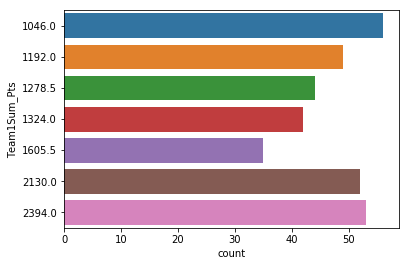